In [1]:
import os
import pandas as pd
from pathlib import Path
import numpy as np
import datetime as dt
import csv
%matplotlib inline

In [2]:
# bringing in data
bitcoin_path = ("../Data/clean/Bitcoin.csv")
gold_path = ("../Data/clean/Gold.csv")
vnq_path = ("../Data/clean/VNQ.csv")
sp500_path = ("../Data/clean/sp500.csv")
fang_path = ("../Data/clean/FAANG.csv")

In [3]:
# reading in data
bitcoin_df = pd.read_csv(bitcoin_path)
gold_df = pd.read_csv(gold_path)
vnq_df = pd.read_csv(vnq_path)
sp500_df = pd.read_csv(sp500_path)
fang_df = pd.read_csv(fang_path)

In [4]:
# data that does not change on weekends

no_weekend = pd.concat([gold_df, sp500_df, vnq_df], axis=1, join= "inner")

Cols = list(no_weekend.columns)

for i, item in enumerate(no_weekend.columns):
    if item in no_weekend.columns[:i]:Cols[i] = "toDROP"

no_weekend.columns = Cols

joined_no_weekend = no_weekend.drop("toDROP", 1).set_index("Date", inplace=False).dropna()

joined_no_weekend = joined_no_weekend.iloc[::-1]
joined_no_weekend.head()

,GOLD,sp500,VNQ
Date,,,
2019-10-14,1527.1,2984.87,77.10
2019-10-15,1513.1,2977.62,76.08
2019-10-16,1523.4,2961.79,77.94
2019-10-17,1527.8,2976.74,79.21
2019-10-18,1523.0,2940.25,80.36


In [5]:
# changing from daily price to daily pct_change

pct_change_no_fang = joined_no_weekend.pct_change().dropna()

pct_change_no_fang.to_csv("../data/csv_files/weird_dates.csv")
cleaned_no_fang_percentages = pct_change_no_fang.iloc[12:].reset_index()
cleaned_no_fang_percentages.tail()

,Date,GOLD,sp500,VNQ
260,2020-10-23,0.000315,0.003446,0.017277
261,2020-10-26,0.000262,-0.018590,0.007050
262,2020-10-27,0.003253,-0.003026,0.000212
263,2020-10-28,-0.017103,-0.035288,0.001803
264,2020-10-29,-0.005614,0.011947,-0.003599


In [6]:
# FAANG DF, percent change
fang_df.tail()

,Date,FAANG
246,2020-10-22,-0.002887
247,2020-10-23,0.008706
248,2020-10-26,-0.009420
249,2020-10-27,0.014342
250,2020-10-28,-0.038724


In [7]:
sorta_clean = pd.concat([cleaned_no_fang_percentages, fang_df], axis="columns", join="outer")
Cols = list(sorta_clean.columns)

for i, item in enumerate(sorta_clean.columns):
    if item in sorta_clean.columns[:i]:Cols[i] = "toDROP"

sorta_clean.columns = Cols

joined_sorta_clean = sorta_clean.drop("toDROP", 1).set_index("Date", inplace=False).dropna()

joined_sorta_clean.to_csv("../data/clean/clean_no_btc.csv")
joined_sorta_clean.tail()

,GOLD,sp500,VNQ,FAANG
Date,,,,
2020-10-05,0.006553,0.017976,-0.003158,-0.002887
2020-10-06,-0.005885,-0.013988,0.003714,0.008706
2020-10-07,-0.009430,0.017406,0.014256,-0.009420
2020-10-08,0.002274,0.008007,0.000536,0.014342
2020-10-09,0.016411,0.008791,-0.001716,-0.038724


In [8]:
### Practicing With Widgets

In [21]:
import os
import pandas as pd
from pathlib import Path
import csv
import panel as pn

In [22]:
import hvplot.pandas

In [23]:
five_assets_df = pd.read_csv("../Data/clean/five_Assets.csv", index_col="Date", parse_dates=True, infer_datetime_format=False)
five_assets_df.drop(columns=["Unnamed: 0"], inplace=True)

In [24]:
import ipywidgets as widgets

In [25]:


wGLD = widgets.IntSlider(description="Gold")

wSNP = widgets.IntSlider(description="SNP500")

wVNQ = widgets.IntSlider(description="VNQ")

wBTC = widgets.IntSlider(description="BTC")

wFNG = widgets.IntSlider(description="FNG")


display(wGLD, wSNP, wVNQ, wBTC, wFNG)


IntSlider(value=0, description='Gold')

IntSlider(value=0, description='SNP500')

IntSlider(value=0, description='VNQ')

IntSlider(value=0, description='BTC')

IntSlider(value=0, description='FNG')

[0, 0, 0, 100, 0]

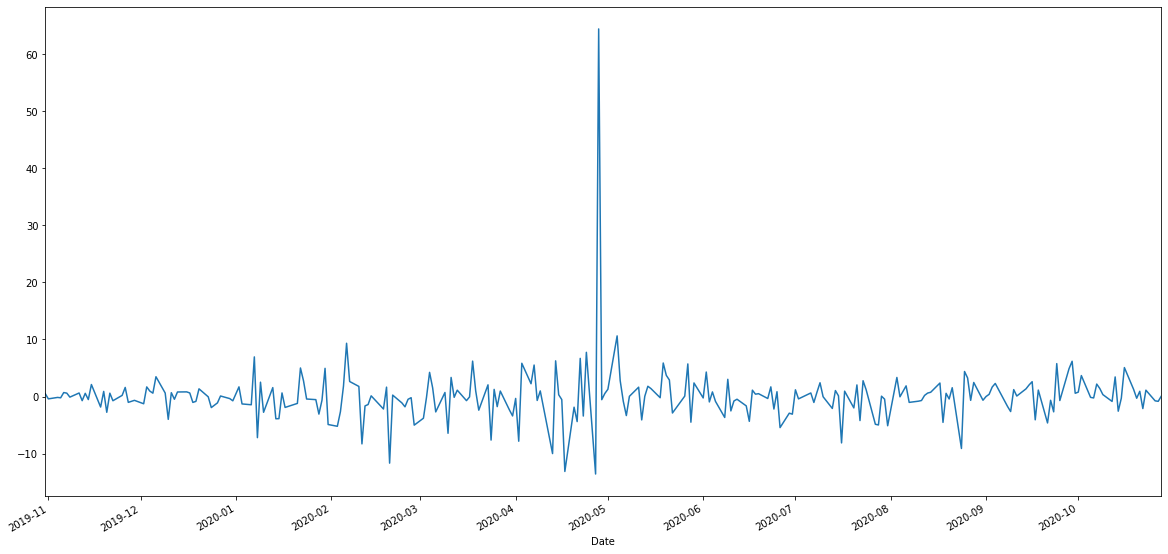

In [17]:
GLD = wGLD.value
SNP = wSNP.value
VNQ = wVNQ.value
BTC = wBTC.value
FNG= wFNG.value

if GLD + SNP + VNQ + BTC + FNG == 100:
    portfolio_weights = [GLD, SNP, VNQ, BTC, FNG]

    portfolio_return = five_assets_df.dot(portfolio_weights)

    portfolio_return.plot(figsize = (20, 10))
    #portfolio_return.hvplot.line()


else:
    print("Adjust your inputs. Total weight must equal 1")

portfolio_weights

In [19]:
pane1 = pn.Column("Widgets", widgets)
pane1

NameError: name 'pn' is not defined

In [172]:
# demo, doesn't allow to toggle, but looks like what we want

def interaction1():
    wGLD = widgets.IntSlider(description="Gold", value=10)
    wSNP = widgets.IntSlider(description="SNP500", value=30)
    wVNQ = widgets.IntSlider(description="VNQ", value=5)
    wBTC = widgets.IntSlider(description="BTC", value=5)
    wFNG = widgets.IntSlider(description="FNG", value=50)

    display(wGLD, wSNP, wVNQ, wBTC, wFNG)
        # display(wGLD, wSNP, wVNQ, wBTC, wFNG)

    # def values(interaction): 

    GLD = wGLD.value
    SNP = wSNP.value
    VNQ = wVNQ.value
    BTC = wBTC.value
    FNG= wFNG.value


    if GLD + SNP + VNQ + BTC + FNG == 100:
        portfolio_weights = [GLD, SNP, VNQ, BTC, FNG]


        portfolio_return = five_assets_df.dot(portfolio_weights)

        portfolio_return.plot(figsize = (20, 10))
        #portfolio_return.hvplot.line()

    else:
        print("Adjust your inputs. Total weight must equal 1")

        portfolio_weights


IntSlider(value=10, description='Gold')

IntSlider(value=30, description='SNP500')

IntSlider(value=5, description='VNQ')

IntSlider(value=5, description='BTC')

IntSlider(value=50, description='FNG')

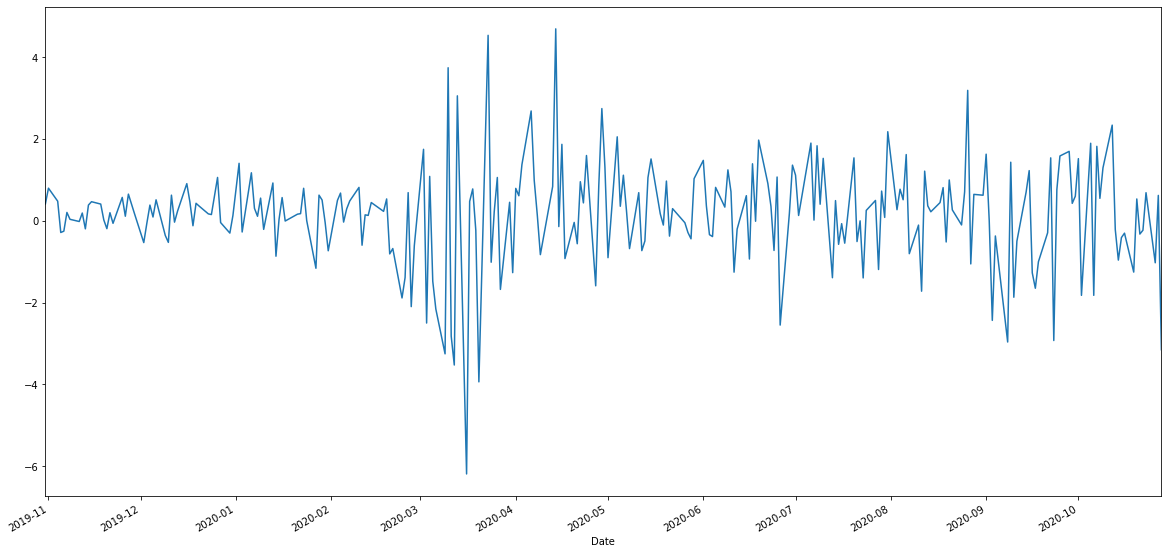

In [174]:
first_tab = pn.Column("Asset Weights", interaction1)

In [210]:

wGLD = widgets.IntSlider(
    value=.20,
    min=0,
    max=1,
    step=.05,
    description="Gold"
)
wSNP = widgets.IntSlider(
    value=.20,
    min=0,
    max=1,
    step=.05,
    description="SNP500"
)
wVNQ = widgets.IntSlider(
    value=.20,
    min=0,
    max=1,
    step=.05,
    description="VNQ"
)
wBTC = widgets.IntSlider(
    value=.20,
    min=0,
    max=1,
    step=.05,
    description="BTC"
)
wFNG = widgets.IntSlider(
    value=.20,
    min=0,
    max=1,
    step=.05,
    description="FNG"
)

container = display(wGLD, wSNP, wVNQ, wBTC, wFNG)

IntSlider(value=0, description='Gold', max=1, step=0)

IntSlider(value=0, description='SNP500', max=1, step=0)

IntSlider(value=0, description='VNQ', max=1, step=0)

IntSlider(value=0, description='BTC', max=1, step=0)

IntSlider(value=0, description='FNG', max=1, step=0)

In [208]:
def something():
    if wGLD.value + wSNP.value + wVNQ.value + wBTC.value + wFNG.value ==1:
        more_weights = [wGLD.value, wSNP.value, wVNQ.value, wBTC.value, wFNG.value]

        more_returns = five_assets_df.dot(more_weights)

        more_returns.plot()
    else:
        print("Invalid asset allocation")

In [209]:
fuckers = pn.Column("ay yo bitch", something)

Invalid asset allocation
